<a href="https://colab.research.google.com/github/ninavergara605/dimension_analysis/blob/master/test_curve_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
! pip install fbm

In [8]:
import numpy as np
import itertools
import scipy
import pandas as pd
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline
import fbm
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
from fbm import FBM
known_dim_data = {}

def get_fbm_samples(dimension):
  h = -dimension + 2
  f = FBM(n=1000, hurst=h, method='cholesky')
  fbm_sample = f.fbm()
  return fbm_sample

dimensions = [1.2, 1.75]
for dim in dimensions:
  sample = get_fbm_samples(dim)
  title = 'FBM Dimension: ' + str(dim)
  known_dim_data[title] = sample


# The Koch curve has a known theoretical dimension of ~1.261
koch_curve_url = 'https://raw.githubusercontent.com/ninavergara605/dimension_analysis/master/koch_curve.csv'
koch_curve = pd.read_csv(koch_curve_url, nrows=160).squeeze().str.split(" ", expand=True).apply(pd.to_numeric, errors='ignore').values
known_dim_data['Koch Curve Dimension: ~1.261'] = koch_curve

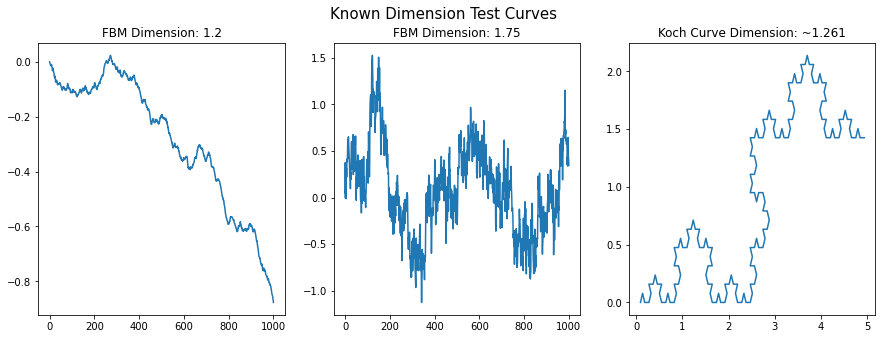

In [19]:
fig, axes = plt.subplots(ncols=3, figsize=(15,5))
for ax, (tag, points) in zip(axes, known_dim_data.items()):
  ax.set_title(tag)
  if 'Koch Curve' in tag:
    ax.plot(points[:,0], points[:,1])
  else:
    ax.plot(points)
fig.suptitle('Known Dimension Test Curves', fontsize=15);

In [20]:
for tag, data in known_dim_data.items():
  if 'Koch Curve' in tag:
    continue
  dimension = tag.split(':')[-1]
  df = pd.DataFrame(data)
  df.to_csv('/content/gdrive/MyDrive/dimension_analysis/FBM_' + dimension)